In [30]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
from math import pi

In [31]:
def w(k, x):
    return m.cos(k * pi * x)
n = 10
x = [i / n for i in range(n + 1)]

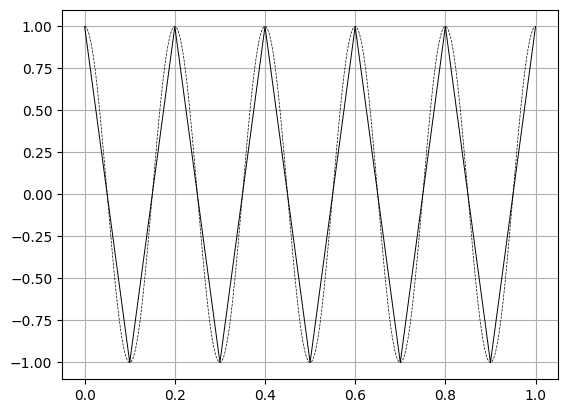

In [32]:
X = np.linspace(0, 1, 1000)
Y = np.cos(X * pi * n)
plt.plot(X, Y, label = "$\cos(x)$", linestyle = '--', color = 'black', linewidth = 0.5)

plt.grid()

for k in [n]:
    y = [w(k, t) for t in x]
    plt.plot(x, y, linewidth = 0.7, color = 'black')


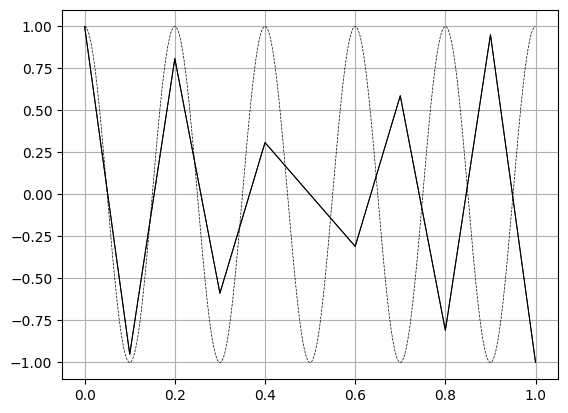

In [34]:
X = np.linspace(0, 1, 1000)
Y = np.cos(X * pi * n)
plt.plot(X, Y, label = "$\cos(x)$", linestyle = '--', color = 'black', linewidth = 0.5)

plt.grid()

for k in [n+1,n-1]:
    y = [w(k, t) for t in x]
    plt.plot(x, y, linewidth = 0.7, color = 'black')

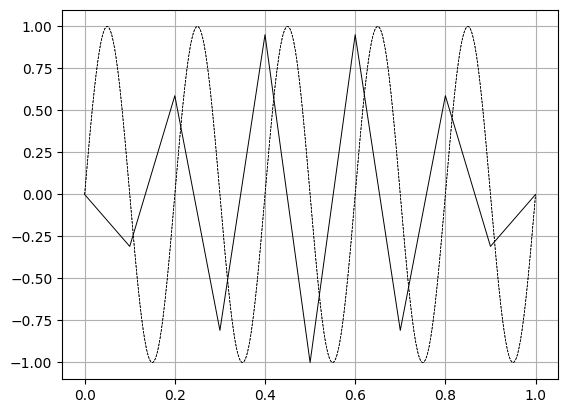

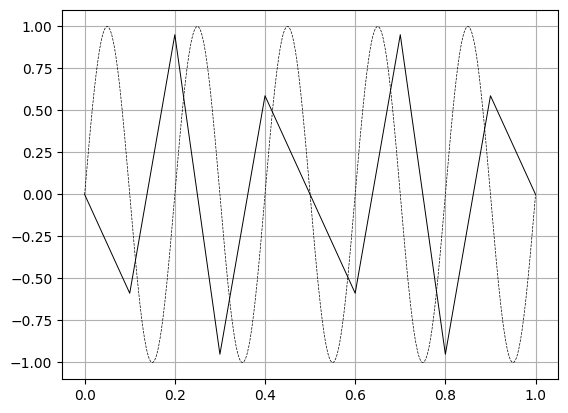

In [55]:
X = np.linspace(0, 1, 1000)
Y = np.sin(X * pi * n)
plt.plot(X, Y, label = "$\sin(x)$", linestyle = '--', color = 'black', linewidth = 0.5)

for k in [11, 12]:
    y = [m.sin(k * pi * xx) for xx in x]
    plt.grid()
    plt.plot(X, Y, label = "$\sin(x)$", linestyle = '--', color = 'black', linewidth = 0.5)
    plt.plot(x, y, linewidth = 0.7, color = 'black')
    plt.show()

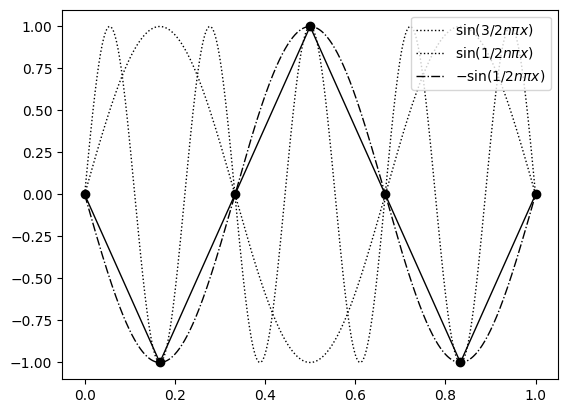

In [85]:
X = np.linspace(0, 1, 1000)
Y1 = np.sin(X * pi * 9)
Y2 = -np.sin(X * pi * 3)
def w(k, x):
    return m.sin(k * pi * x)

x = [i / 6 for i in range(0, 6 + 1)]
y = [-w(3, xx) for xx in x]

plt.plot(X, Y1, color = 'black', linestyle = ':', linewidth = 1, label = "$\sin(3/2 n \pi x)$")
plt.plot(X, -Y2, color = 'black', linestyle = ':', linewidth = 1, label = "$\sin(1/2 n \pi x)$")
plt.plot(X, Y2, color = 'black', linestyle = '-.', linewidth = 1, label = "$-\sin(1/2 n \pi x)$")
plt.plot(x, y, color = 'black', marker = 'o', linewidth = 1)
plt.legend(loc = 'upper right')

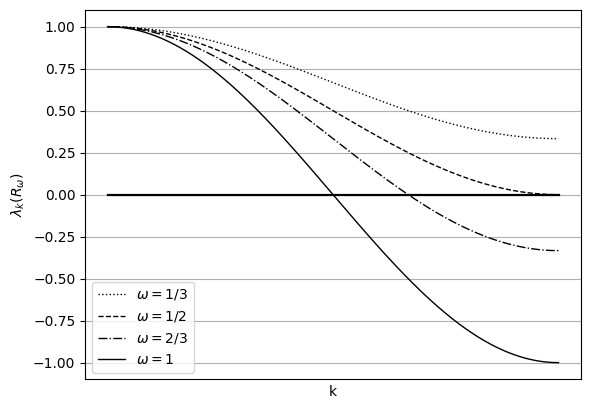

In [106]:
X = np.linspace(0, 6, 1000)
W = [1/3, 1/2, 2/3, 1]
Y = []
for w in W:
    Y.append([1-2*w*m.sin(x*pi/2/6)**2 for x in X])
plt.plot(X, Y[0], linewidth=1, label="$\omega=$1/3", linestyle=':' , color = 'black')    
plt.plot(X, Y[1], linewidth=1, label="$\omega=$1/2", linestyle='--', color = 'black')
plt.plot(X, Y[2], linewidth=1, label="$\omega=$2/3", linestyle='-.', color = 'black')
plt.plot(X, Y[3], linewidth=1, label="$\omega=$1"  , linestyle='-' , color = 'black')
plt.grid(True)
plt.ylabel("$\lambda_k(R_{\omega})$")
plt.xlabel("k")
plt.xticks([])
plt.plot(X, [0]*1000, linewidth=1.6, color='black')
plt.legend(loc = "lower left")

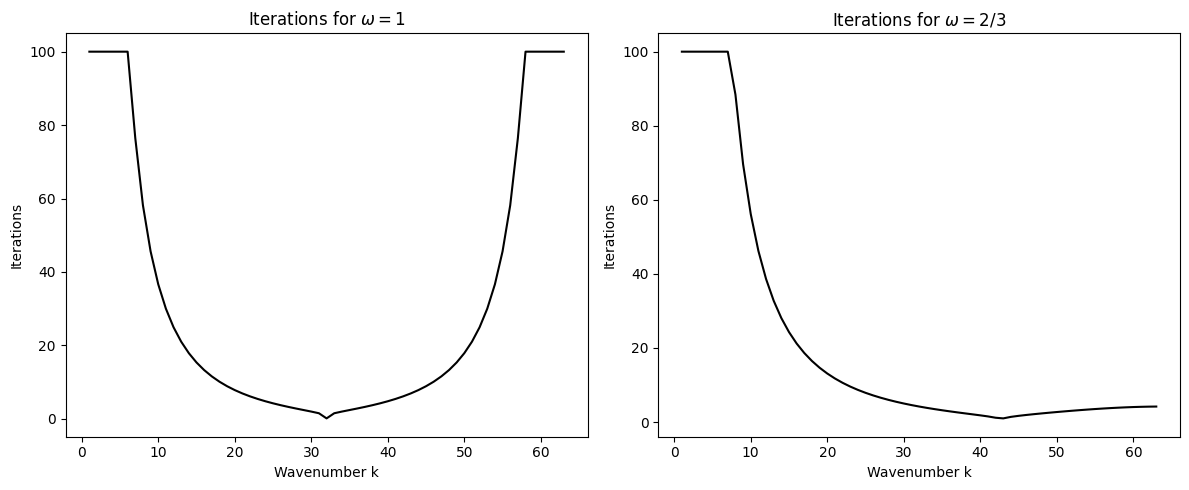

In [126]:
import math as m
n = 64
X = [i for i in range(1, n)]
Y1 = []
Y2 = []
def lambda_k(k, o):
    return 1-2*o*m.sin(k*pi/2/64)**2

def get_n(k, o):
    return min(100, (m.log(0.01) / m.log(abs(lambda_k(k, o)))))

for i in X:
    Y1.append(get_n(i, 1))
    Y2.append(get_n(i, 2/3))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X, Y1, color='black', label='$\omega=1$')
plt.xlabel("Wavenumber k")
plt.ylabel("Iterations")
plt.title('Iterations for $\omega=1$')
plt.subplot(1, 2, 2)
plt.plot(X, Y2, color='black', label='$\omega=2/3$')
plt.xlabel("Wavenumber k")
plt.ylabel("Iterations")
plt.title('Iterations for $\omega=2/3$')
plt.tight_layout()

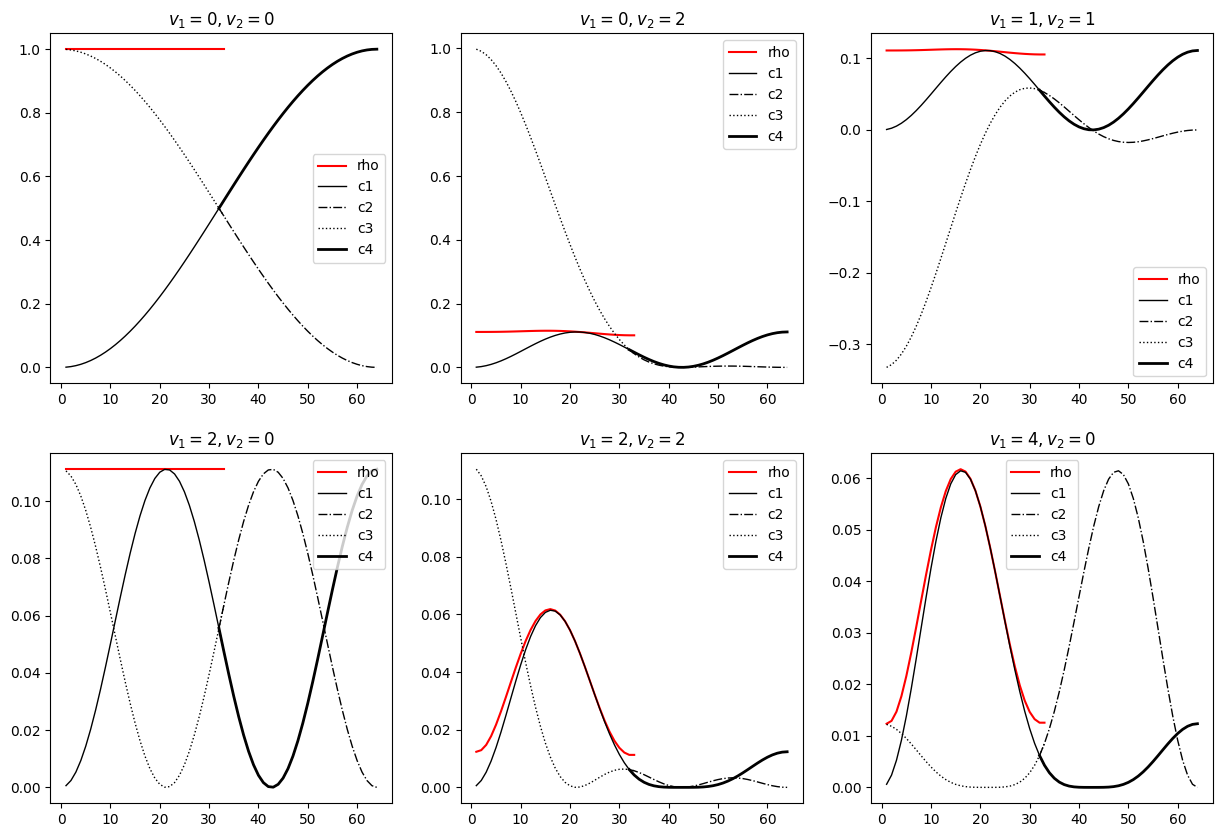

In [146]:
n = 64
def lambda_k(k, o=2/3):
    return 1-2*o*m.sin(k*pi/2/n)**2
def c(k):
    return m.cos(k*pi/2/n)**2
def s(k):
    return m.sin(k*pi/2/n)**2
K1 = range(1, (n//2)+2)
K2 = range((n//2), n+1)
args = [[0, 0], [0, 2], [1, 1], [2, 0], [2, 2], [4, 0]]
plt.figure(figsize=(15, 10))

def rho(matrix):
    eigenvalues, _ = np.linalg.eig(matrix)
    max_eigenvalue_abs = np.max(np.abs(eigenvalues))
    return max_eigenvalue_abs

for i, [nu1, nu2] in enumerate(args, start=1):
    plt.subplot(2, 3, i)
    C1 = []
    C2 = []
    C3 = []
    C4 = []
    R = []
    for k in K1:
        k_ = n - k
        C1.append(lambda_k(k)**(nu1+nu2)*s(k))
        C3.append(lambda_k(k_)**nu1*lambda_k(k)**nu2*c(k))
    for k in K2:
        k_ = n - k
        C2.append(lambda_k(k_)**nu1*lambda_k(k)**nu2*s(k_))
        C4.append(lambda_k(k)**(nu1+nu2)*c(k_))
    id1 = 0
    id2 = len(C2) - 1
    for k in K1:
        k_ = n - k
        c1 = C1[id1]
        c2 = C2[id2]
        c3 = C3[id1]
        c4 = C4[id2]
        id1 = id1 + 1
        id2 = id2 - 1
        R.append(rho([[c1, c2], [c3, c4]]))
    plt.plot(K1, R,  color = 'red', label = 'rho')
    plt.plot(K1, C1, color = 'black', linestyle = '-', linewidth = 1, label = 'c1')
    plt.plot(K2, C2, color = 'black', linestyle = '-.', linewidth = 1, label = 'c2')
    plt.plot(K1, C3, color = 'black', linestyle = ':', linewidth = 1, label = 'c3')
    plt.plot(K2, C4, color = 'black', linestyle = '-', linewidth = 2, label = 'c4')
    plt.title("$v_1 = {}, v_2 = {}$".format(nu1, nu2))
    plt.legend()

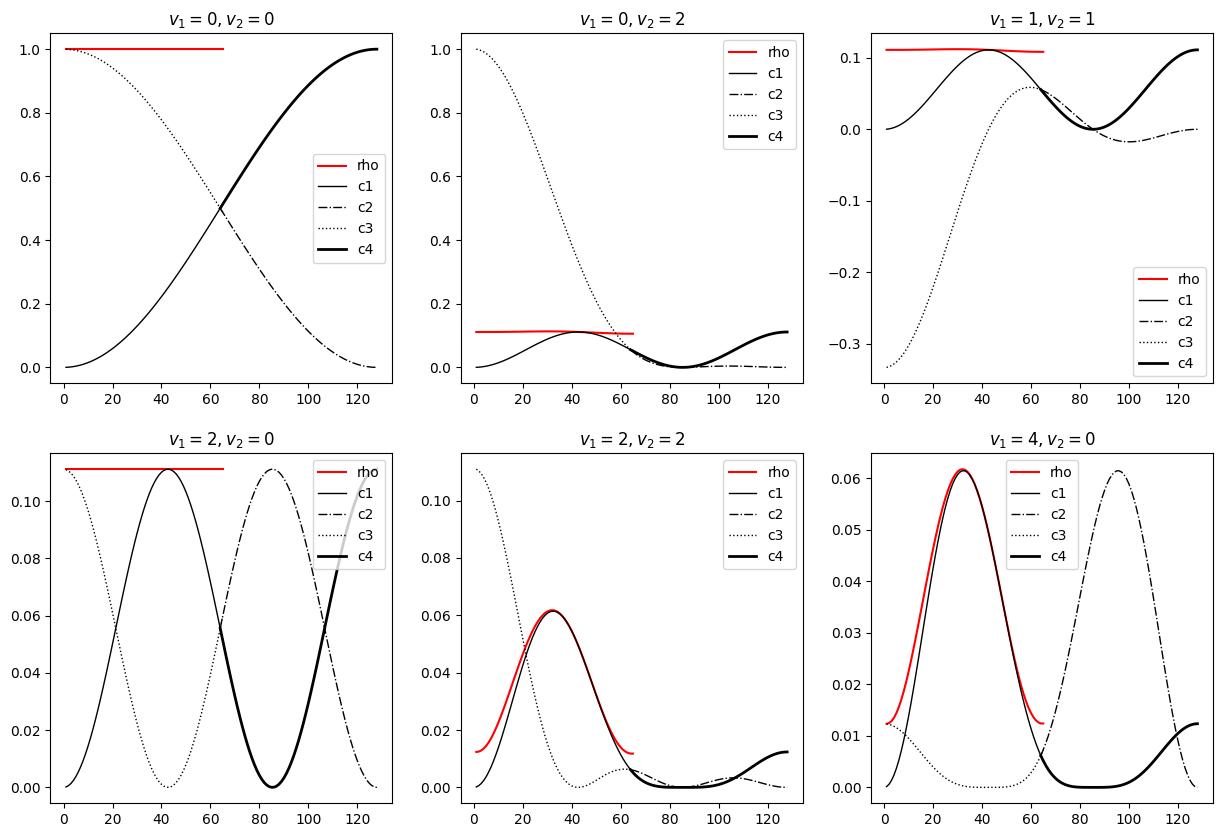

In [145]:
n = 128
def lambda_k(k, o=2/3):
    return 1-2*o*m.sin(k*pi/2/n)**2
def c(k):
    return m.cos(k*pi/2/n)**2
def s(k):
    return m.sin(k*pi/2/n)**2
K1 = range(1, (n//2)+2)
K2 = range((n//2), n+1)
args = [[0, 0], [0, 2], [1, 1], [2, 0], [2, 2], [4, 0]]
plt.figure(figsize=(15, 10))

def rho(matrix):
    eigenvalues, _ = np.linalg.eig(matrix)
    max_eigenvalue_abs = np.max(np.abs(eigenvalues))
    return max_eigenvalue_abs

for i, [nu1, nu2] in enumerate(args, start=1):
    plt.subplot(2, 3, i)
    C1 = []
    C2 = []
    C3 = []
    C4 = []
    R = []
    for k in K1:
        k_ = n - k
        C1.append(lambda_k(k)**(nu1+nu2)*s(k))
        C3.append(lambda_k(k_)**nu1*lambda_k(k)**nu2*c(k))
    for k in K2:
        k_ = n - k
        C2.append(lambda_k(k_)**nu1*lambda_k(k)**nu2*s(k_))
        C4.append(lambda_k(k)**(nu1+nu2)*c(k_))
    id1 = 0
    id2 = len(C2) - 1
    for k in K1:
        k_ = n - k
        c1 = C1[id1]
        c2 = C2[id2]
        c3 = C3[id1]
        c4 = C4[id2]
        id1 = id1 + 1
        id2 = id2 - 1
        R.append(rho([[c1, c2], [c3, c4]]))
    plt.plot(K1, R,  color = 'red', label = 'rho')
    plt.plot(K1, C1, color = 'black', linestyle = '-', linewidth = 1, label = 'c1')
    plt.plot(K2, C2, color = 'black', linestyle = '-.', linewidth = 1, label = 'c2')
    plt.plot(K1, C3, color = 'black', linestyle = ':', linewidth = 1, label = 'c3')
    plt.plot(K2, C4, color = 'black', linestyle = '-', linewidth = 2, label = 'c4')
    plt.title("$v_1 = {}, v_2 = {}$".format(nu1, nu2))
    plt.legend()